In [59]:
# imports all libraries
import os
import pandas as pd
import seaborn as sns
import requests
from sklearn.preprocessing import OneHotEncoder
from bs4 import BeautifulSoup
from dotenv import load_dotenv
# load environment variables
load_dotenv()

True

# Task 1
## Download data and load to pandas dataframe

1. csv format
   * https://www.sistemulenergetic.ro/
   * https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv

2. json format

   World Air Quality – OpenAQ for Moldova (json format) from https://public.opendatasoft.com/
   
4. API

   Weather forecast for Chisinau from https://openweathermap.org

In [2]:
# 1. read csv format
energ_df = pd.read_csv('./datasets/sistemulenergetic_ro.csv')
print(energ_df.info())
print(energ_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1404 non-null   object
 1   carbune       1404 non-null   int64 
 2   consum        1404 non-null   int64 
 3   hidro         1404 non-null   int64 
 4   hidrocarburi  1404 non-null   int64 
 5   nuclear       1404 non-null   int64 
 6   eolian        1404 non-null   int64 
 7   productie     1404 non-null   int64 
 8   fotovolt      1404 non-null   int64 
 9   biomasa       1404 non-null   int64 
 10  stocare       1404 non-null   int64 
 11  sold          1404 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 131.8+ KB
None
                  date  carbune  consum  hidro  hidrocarburi  nuclear  eolian  \
0  2025-10-01 08:08:38     1017    6740   1444          1263     1359     146   
1  2025-09-30 20:38:08     1026    7344   1916          1338     1360     254   
2  2

In [3]:
epid_df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv')
print(epid_df.info())
print(epid_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   location_key          object 
 2   new_confirmed         float64
 3   new_deceased          float64
 4   new_recovered         float64
 5   new_tested            float64
 6   cumulative_confirmed  float64
 7   cumulative_deceased   float64
 8   cumulative_recovered  float64
 9   cumulative_tested     float64
dtypes: float64(8), object(2)
memory usage: 955.6+ MB
None
         date location_key  new_confirmed  new_deceased  new_recovered  \
0  2020-01-01           AD            0.0           0.0            NaN   
1  2020-01-02           AD            0.0           0.0            NaN   
2  2020-01-03           AD            0.0           0.0            NaN   
3  2020-01-04           AD            0.0           0.0            NaN   
4  2020-01-05           AD          

In [4]:
# 2. JSON format
url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/openaq/exports/json/?lang=en&timezone=Europe%2FChisinau'
oaq_df = pd.read_json(url)
print(oaq_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61177 entries, 0 to 61176
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   61177 non-null  object 
 1   city                      32639 non-null  object 
 2   location                  61177 non-null  object 
 3   coordinates               61107 non-null  object 
 4   measurements_parameter    61177 non-null  object 
 5   measurements_sourcename   61177 non-null  object 
 6   measurements_unit         61177 non-null  object 
 7   measurements_value        61177 non-null  float64
 8   measurements_lastupdated  61177 non-null  object 
 9   country_name_en           61050 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.7+ MB
None


In [5]:
md_oaq = oaq_df[oaq_df['country'] == 'MD']
md_oaq.head()

country city  location                          coordinates  \
54829      MD  N/A  Chisinau  {'lon': 28.81938, 'lat': 47.021561}   

      measurements_parameter measurements_sourcename measurements_unit  \
54829                  PM2.5                  AirNow             µg/m³   

       measurements_value   measurements_lastupdated       country_name_en  
54829                13.0  2024-08-09T15:00:00+03:00  Moldova, Republic of

In [6]:
# 3. API
API_KEY = os.getenv("OPENWEATHER_API_KEY")
BASE_URL = "https://api.openweathermap.org"

def get_city_geo(cityName: str) -> (int, int):
    api_version = "1.0"
    params = { "q": cityName, "appid": API_KEY }
    resp = requests.get(f"{BASE_URL}/geo/{api_version}/direct", params=params)
    data = resp.json()
    match data:
        case [{ 'lat': lat, 'lon': lon }]:
            return (lat, lon)
        case _:
            raise ValueError("City data not found")

def get_forecast(lat: int, lon: int) -> any:
    api_version = "2.5"
    params = { "appid": API_KEY, "lat": lat, "lon": lon }
    resp = requests.get(f"{BASE_URL}/data/{api_version}/forecast", params)
    return resp.json()

    
lat, lon = get_city_geo("Chisinau")
forecast_data = get_forecast(lat, lon)
forecast_df = pd.DataFrame(forecast_data['list'])
print(forecast_df.info())
print(forecast_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          40 non-null     int64  
 1   main        40 non-null     object 
 2   weather     40 non-null     object 
 3   clouds      40 non-null     object 
 4   wind        40 non-null     object 
 5   visibility  40 non-null     int64  
 6   pop         40 non-null     float64
 7   sys         40 non-null     object 
 8   dt_txt      40 non-null     object 
 9   rain        10 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.3+ KB
None
           dt                                               main  \
0  1759330800  {'temp': 280.82, 'feels_like': 278.03, 'temp_m...   
1  1759341600  {'temp': 280.72, 'feels_like': 278.17, 'temp_m...   
2  1759352400  {'temp': 280.12, 'feels_like': 277.58, 'temp_m...   
3  1759363200  {'temp': 278.79, 'feels_like': 275.39, 'temp_m...  

# Task 2

Scrape date from Bucharest airport for departure flights and download them
to pandas dataframe. Add attribute date and time of scraping

URL: https://www.bucharestairports.ro/

In [7]:

def get_airport_data():
    AIRPORT_URL = "https://www.bucharestairports.ro/"
    # disable ssl warnings
    import urllib3
    urllib3.disable_warnings()
    
    resp = requests.get(AIRPORT_URL, verify=False, timeout=20)
    bs = BeautifulSoup(resp.content)
    
    def get_data_from_table(tip: str, table: list[any]) -> list[dict]:
        data = []
        for row in table:
            colums = row.select('td')
            origine = destinatie = 'Bucuresti (OTP)'
            if tip == 'sosiri':
                origine = colums[1].text
            else:
                destinatie = colums[1].text
            data.append({
                "tip": tip,
                "cursa": colums[0].text,
                "origine": origine,
                "destinatie": destinatie,
                "ora": colums[2].text,
                "ora_est": colums[3].text,
                "status": colums[4].text
            })
        return data
        
    sosiri_table = bs.select('div#sosiri_inner tr')
    plecari_table = bs.select('div#plecari_inner tr')
    return get_data_from_table('sosiri', sosiri_table) + get_data_from_table('plecari', plecari_table)
                        
airport_df = pd.DataFrame(get_airport_data())
airport_df['created_at'] = pd.Timestamp.now(tz="UTC")
print(airport_df.info())
print(airport_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tip         497 non-null    object             
 1   cursa       497 non-null    object             
 2   origine     497 non-null    object             
 3   destinatie  497 non-null    object             
 4   ora         497 non-null    object             
 5   ora_est     497 non-null    object             
 6   status      497 non-null    object             
 7   created_at  497 non-null    datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), object(7)
memory usage: 31.2+ KB
None
      tip   cursa           origine       destinatie    ora ora_est    status  \
0  sosiri  W43026     LARNACA (LCA)  Bucuresti (OTP)  00:05   00:47  Aterizat   
1  sosiri  W43148  LAS PALMAS (LPA)  Bucuresti (OTP)  00:05   00:44  Aterizat   
2  sosiri   OS787      VIENNA (VIE)  Bucuresti (OTP) 

# Task 3

1. Download data from https://archive.ics.uci.edu/dataset/222/bank+marketing

2. Make Exploratory Data Analysis

3. Identify outliers in “campaign” and “duration”

4. Transform categorial data from “maritial” feature

In [64]:
df = pd.read_csv('./datasets/bank-full.csv', delimiter=';')

## Exploratory data analysis

In [9]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.value_counts()

age  job      marital  education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
95   retired  married  secondary  no       0        no       no    telephone  1    oct    215       1         -1     0         unknown   no     1
18   student  single   primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes    1
                                                                              13   nov    210       1          93    1         success   yes    1
                                           1944     no       no    telephone  10   aug    122       3         -1     0         unknown   no     1
                       secondary  no       5        no       no    cellular   24   aug    143       2         -1     0         unknown   no     1
                                                                                                                                 

In [21]:
df.describe(include="all").T

count unique          top   freq         mean          std  \
age        45211.0    NaN          NaN    NaN     40.93621    10.618762   
job          45211     12  blue-collar   9732          NaN          NaN   
marital      45211      3      married  27214          NaN          NaN   
education    45211      4    secondary  23202          NaN          NaN   
default      45211      2           no  44396          NaN          NaN   
balance    45211.0    NaN          NaN    NaN  1362.272058  3044.765829   
housing      45211      2          yes  25130          NaN          NaN   
loan         45211      2           no  37967          NaN          NaN   
contact      45211      3     cellular  29285          NaN          NaN   
day        45211.0    NaN          NaN    NaN    15.806419     8.322476   
month        45211     12          may  13766          NaN          NaN   
duration   45211.0    NaN          NaN    NaN    258.16308   257.527812   
campaign   45211.0    NaN          NaN    NaN     2.763841     3.098021   
pdays      45211.0    NaN          NaN    NaN    40.197828   100.128746   
previous   45211.0    NaN          NaN    NaN     0.580323     2.303441   
poutcome     45211      4      unknown  36959          NaN          NaN   
y            45211      2           no  39922          NaN          NaN   

              min    25%    50%     75%       max  
age          18.0   33.0   39.0    48.0      95.0  
job           NaN    NaN    NaN     NaN       NaN  
marital       NaN    NaN    NaN     NaN       NaN  
education     NaN    NaN    NaN     NaN       NaN  
default       NaN    NaN    NaN     NaN       NaN  
balance   -8019.0   72.0  448.0  1428.0  102127.0  
housing       NaN    NaN    NaN     NaN       NaN  
loan          NaN    NaN    NaN     NaN       NaN  
contact       NaN    NaN    NaN     NaN       NaN  
day           1.0    8.0   16.0    21.0      31.0  
month         NaN    NaN    NaN     NaN       NaN  
duration      0.0  103.0  180.0   319.0    4918.0  
campaign      1.0    1.0    2.0     3.0      63.0  
pdays        -1.0   -1.0   -1.0    -1.0     871.0  
previous      0.0    0.0    0.0     0.0     275.0  
poutcome      NaN    NaN    NaN     NaN       NaN  
y             NaN    NaN    NaN     NaN       NaN

<Axes: xlabel='age'>

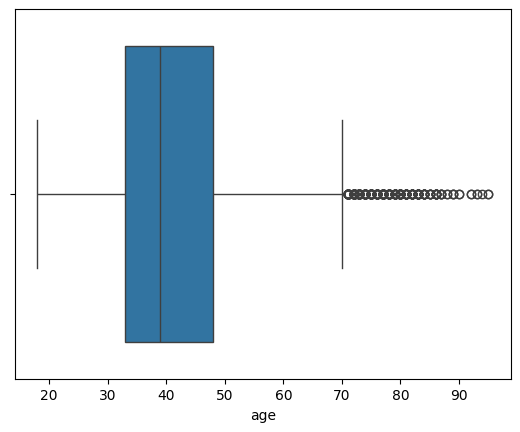

In [22]:
sns.boxplot(x=df["age"])

## Identify outliers

In [65]:

# Identify outliers in “campaign”
campaign_mean, campaign_std = df["campaign"].mean(), df["campaign"].std()
cut_off = campaign_std * 3
lower, upper = campaign_mean - cut_off, campaign_mean + cut_off
print(f"Numbers of outliers for 'campaign' is: {df[~df["campaign"].between(lower, upper)]["campaign"].count()}")
df_campaign = df[df["campaign"].between(lower, upper)]

Numbers of outliers for 'campaign' is: 840


In [66]:
df_campaign.describe()

age        balance           day      duration      campaign  \
count  44371.000000   44371.000000  44371.000000  44371.000000  44371.000000   
mean      40.954520    1367.124834     15.679047    260.452232      2.454531   
std       10.640684    3049.017569      8.277057    257.716365      1.940988   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      74.000000      8.000000    105.000000      1.000000   
50%       39.000000     453.000000     16.000000    182.000000      2.000000   
75%       48.000000    1433.000000     21.000000    321.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     12.000000   

              pdays      previous  
count  44371.000000  44371.000000  
mean      40.957427      0.589822  
std      100.895846      2.315545  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [67]:
# Identify outliers in "duration"
duration_mean, duration_std = df["duration"].mean(), df["duration"].std()
cut_off = duration_std * 3
lower, upper = duration_mean - cut_off, duration_mean + cut_off
print(f"Numbers of outliers for 'duration' is: {df[~df["duration"].between(lower, upper)]["duration"].count()}")
df_duration = df[df["duration"].between(lower, upper)]

Numbers of outliers for 'duration' is: 963


In [68]:
df_duration.describe()

age        balance           day      duration      campaign  \
count  44248.000000   44248.000000  44248.000000  44248.000000  44248.000000   
mean      40.937579    1356.858547     15.816511    233.797369      2.763470   
std       10.616037    3043.789518      8.330001    190.707154      3.099923   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      71.000000      8.000000    102.000000      1.000000   
50%       39.000000     445.000000     16.000000    176.000000      2.000000   
75%       48.000000    1418.250000     21.000000    305.000000      3.000000   
max       95.000000  102127.000000     31.000000   1030.000000     63.000000   

              pdays      previous  
count  44248.000000  44248.000000  
mean      40.352355      0.582309  
std      100.298714      2.310850  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

## Transform categorial data from “maritial” feature

In [79]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['marital']])
print(ohe.categories_)
df[ohe.categories_[0]] = transformed.toarray()
df[["divorced", "married", "single"]].head()

[array(['divorced', 'married', 'single'], dtype=object)]


divorced  married  single
0       0.0      1.0     0.0
1       0.0      0.0     1.0
2       0.0      1.0     0.0
3       0.0      1.0     0.0
4       0.0      0.0     1.0

# Practical Work: YData-profiling

In [82]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profile Report")


In [83]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 41.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
profile.to_file("data_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]